### Verifying Demo Workflow
Date: 7/29/2022

# Demo Workflow: Working with SlideRunner Databases

In [1]:
from SlideRunner.dataAccess.database import Database

## Retrieve demo slide from MITOS_WSI_CCMCT data set

In [2]:
import urllib.request

urllib.request.urlretrieve('https://ndownloader.figshare.com/files/16261553?private_link=a82ddb634864c24f4aee','9374efe6ac06388cc877.svs')



('9374efe6ac06388cc877.svs', <http.client.HTTPMessage at 0x7f8c52418610>)

### Open Demo database

In [3]:
DB = Database().open('demo.sqlite')

slideid = DB.findSlideWithFilename('9374efe6ac06388cc877.svs','')
DB.loadIntoMemory(slideid)


Successfully migrated DB to version 1
Successfully migrated DB to version 2
Successfully migrated DB to version 3


In [4]:
for anno in DB.annotations.keys():
    print(anno,':',DB.annotations[anno])

1 : <SlideRunner.dataAccess.annotations.polygonAnnotation object at 0x7f8c524184f0>
2 : <SlideRunner.dataAccess.annotations.circleAnnotation object at 0x7f8c524194e0>
6 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7f8c524197b0>
7 : <SlideRunner.dataAccess.annotations.spotAnnotation object at 0x7f8c52419570>
8 : <SlideRunner.dataAccess.annotations.rectangularAnnotation object at 0x7f8c52418400>


## Let's first assess the polygon (ID 1)

In [5]:
DB.annotations[1].coordinates

array([[21081, 13763],
       [21169, 13744],
       [21291, 13675],
       [21474, 13588],
       [21474, 13588],
       [21562, 13637],
       [21565, 13637],
       [21565, 13633],
       [21623, 13794],
       [21607, 13969],
       [21535, 14103],
       [21390, 14259],
       [21249, 14370],
       [21111, 14450],
       [20970, 14480],
       [20848, 14385],
       [20806, 14278],
       [20841, 14049],
       [20841, 14049],
       [20909, 13942],
       [20982, 13813],
       [21024, 13786],
       [21081, 13763]])

This is the agreed class by all experts:

In [6]:
DB.annotations[1].agreedClass

1

## For circle annotations we can query the center coordinates and the radius

In [7]:
DB.annotations[2].x1, DB.annotations[2].y1, DB.annotations[2].r

(14283, 11444, 126)

Each object also provides a human readable description:

In [8]:
DB.annotations[2].getDescription(DB)

[['Position', 'x1=14283, y1=11444'],
 ['Anno 1', '2nd class (the expert)'],
 ['Agreed Class', '2nd class']]

In [9]:
DB.annotations[6].getDescription(DB)

[['Position', 'x1=17202, y1=11565'],
 ['Anno 1', '2nd class (the expert)'],
 ['Agreed Class', '2nd class']]

# Drawing 

In [26]:
import openslide
slide = openslide.open_slide('9374efe6ac06388cc877.svs')

In [27]:
import matplotlib.pyplot as plt
import numpy as np
lu = (14000,11300)
img = np.array(slide.read_region( lu, 0, [800,800]))[:,:,0:4]

The original image

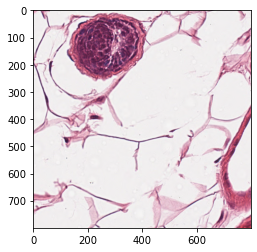

In [28]:
plt.imshow(img)

Now, let's add the circle annotation as an example

In [29]:
from SlideRunner.dataAccess.annotations import ViewingProfile
DB.annotations[2].draw(image=img, leftUpper=lu, zoomLevel=1., thickness=10, vp=ViewingProfile())

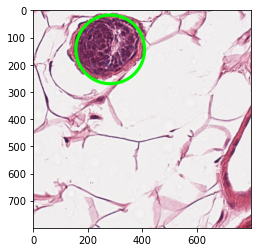

In [30]:
plt.imshow(img)